In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import statistics
from simulation_numba import average_t_asymp
import random

In [19]:
#dynamic_prob = np.arange(0.00, 0.95, 0.005)
dynamic_prob = np.arange(0.00, 0.02, 0.0005)
avg_asymp_t = np.zeros(0)
eliminated_runs = np.zeros(0)

num_node = 9
barabasi_m = 2

for p in dynamic_prob: 
    #dynamic_fraction = f"{p:.4f}"
    d = f'dynamicF_test/N{num_node}_test_results_dynamicF_m{barabasi_m}/F{p:.4f}.dat'
    data = open(d, "r")
    asymp_time_list = []
    for line in data: 
        asymp_time_list.append(int(line.split("\t")[1]))
    avg_t_asymp, med_t_asymp, stddev_t_asymp, tot_runs, runs_eliminated, percentage_eliminated = average_t_asymp(asymp_time_list, 10000)
    avg_asymp_t = np.append(avg_asymp_t, [avg_t_asymp])
    eliminated_runs = np.append(eliminated_runs, [runs_eliminated])
print(len(avg_asymp_t), len(dynamic_prob))

40 40


In [20]:
dynamicP_prob = np.arange(0.00, 0.02, 0.0005)
avg_asymp_t_dynP = np.zeros(0)
eliminated_runs_dynP = np.zeros(0)

num_node = 9
barabasi_m = 2

for p in dynamicP_prob: 
    #dynamic_fraction = f"{p:.4f}"
    d = f'dynamicP_test/N{num_node}_test_results_dynamicP_m{barabasi_m}/F{p:.4f}.dat'
    data = open(d, "r")
    asymp_time_list = []
    for line in data: 
        asymp_time_list.append(int(line.split("\t")[1]))
    avg_t_asymp, med_t_asymp, stddev_t_asymp, tot_runs, runs_eliminated, percentage_eliminated = average_t_asymp(asymp_time_list, 10000)
#     print(p, runs_eliminated)
    avg_asymp_t_dynP = np.append(avg_asymp_t_dynP, avg_t_asymp)
    eliminated_runs_dynP = np.append(eliminated_runs_dynP, runs_eliminated)

[0.0095 0.01   0.0105 0.011  0.0115 0.012  0.0125 0.013  0.0135 0.014
 0.0145 0.015  0.0155 0.016  0.0165 0.017  0.0175 0.018  0.0185 0.019
 0.0195] [0.0095 0.01   0.0105 0.011  0.0115 0.012  0.0125 0.013  0.0135 0.014
 0.0145 0.015  0.0155 0.016  0.0165 0.017  0.0175 0.018  0.0185 0.019
 0.0195]


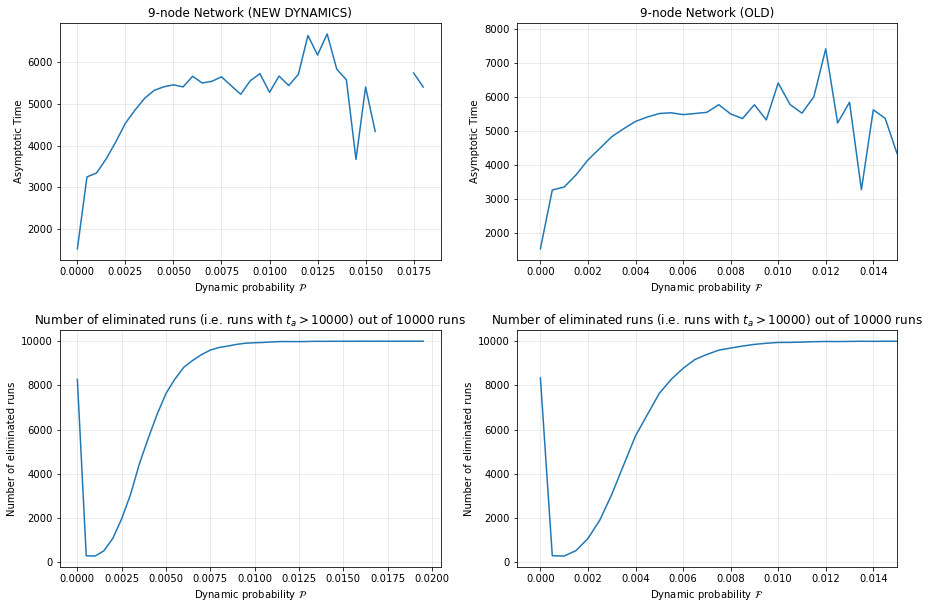

In [23]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
ax = plt.subplot(221)
ax.plot(dynamicP_prob, avg_asymp_t_dynP)
ax.set_xlabel(r"Dynamic probability $\mathcal{P}$")
ax.set_ylabel("Asymptotic Time")
ax.set_title(f"{num_node}-node Network (NEW DYNAMICS)")
#plt.savefig(plot_path + f"N{num_node}_finetune.png")
#ax.set_xlim(-0.001,0.010)
ax.grid(which='both',alpha=0.3)

ax = plt.subplot(223)
ax.plot(dynamicP_prob, eliminated_runs_dynP)
ax.set_xlabel(r"Dynamic probability $\mathcal{P}$")
ax.set_ylabel(r"Number of eliminated runs")
ax.set_title(r"Number of eliminated runs (i.e. runs with $t_a>10000$) out of 10000 runs")
#plt.savefig(plot_path + f"N{num_node}_finetune.png")
#ax.set_xlim(-0.001,0.01)
ax.grid(which='both',alpha=0.3)

ax = plt.subplot(222)
ax.plot(dynamic_prob, avg_asymp_t)
ax.set_xlabel(r"Dynamic probability $\mathcal{F}$")
ax.set_ylabel("Asymptotic Time")
ax.set_title(f"{num_node}-node Network (OLD)")
ax.set_xlim(-0.001,0.015)
ax.grid(which='both',alpha=0.3)
# plt.savefig(plot_path + f"N{num_node}_finetune_cut.png")

ax = plt.subplot(224)
ax.plot(dynamic_prob, eliminated_runs)
ax.set_xlabel(r"Dynamic probability $\mathcal{F}$")
ax.set_ylabel(r"Number of eliminated runs")
ax.set_title(r"Number of eliminated runs (i.e. runs with $t_a>10000$) out of 10000 runs")
#plt.savefig(plot_path + f"N{num_node}_finetune.png")
ax.set_xlim(-0.001,0.015)
ax.grid(which='both',alpha=0.3)

##NOTES: Maybe try plotting the cumilative number of edges modified over 10000 timesteps vs. F/P

print(dynamic_prob[eliminated_runs>9900], dynamicP_prob[eliminated_runs_dynP>9900])

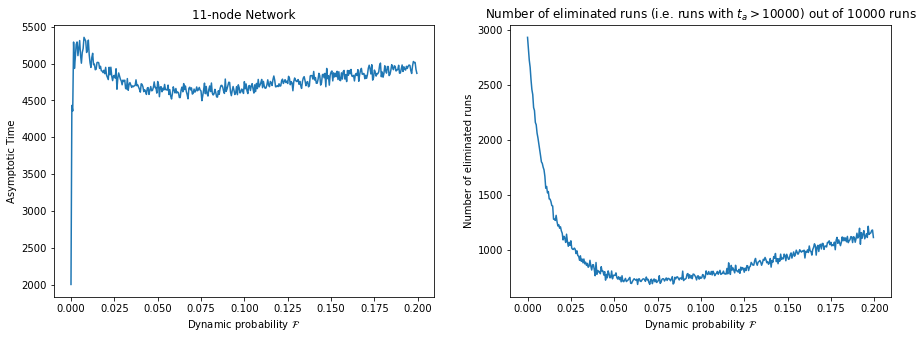

In [67]:
plot_path = "plots/"
try: 
    os.mkdir(plot_path)
except FileExistsError: 
    pass

plt.figure(figsize=(15,5))
ax = plt.subplot(121)
ax.plot(dynamic_prob, avg_asymp_t)
ax.set_xlabel(r"Dynamic probability $\mathcal{F}$")
ax.set_ylabel("Asymptotic Time")
ax.set_title(f"{num_node}-node Network")
#ax.xlim(-0.001,0.01)

ax = plt.subplot(122)
ax.plot(dynamic_prob, eliminated_runs)
ax.set_xlabel(r"Dynamic probability $\mathcal{F}$")
ax.set_ylabel(r"Number of eliminated runs")
ax.set_title(r"Number of eliminated runs (i.e. runs with $t_a>10000$) out of 10000 runs")

#plt.savefig(plot_path + f"N{num_node}_finetune_cut.png")
plt.savefig(plot_path + f"N{num_node}_finetune.png")


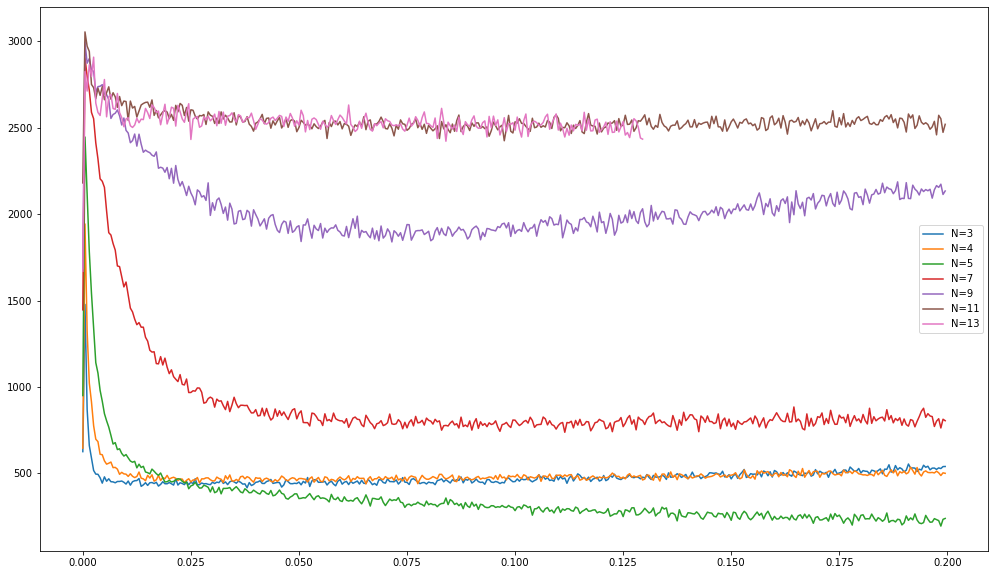

In [69]:
dynamic_prob = np.arange(0.00, 0.2, 0.0005)

num_node_list = [3,4,5,7,9,11,13]
#num_node_list = [9]

min_asymp_t = []
min_dynamic_prob = []
all_asymp_t_stddev = []

plt.figure(figsize=(17,10))
for num_node in num_node_list: 
    avg_asymp_t = []
    stddev_asymp_t = []
    dynamic_prob_list = []
    for p in dynamic_prob: 
        dynamic_fraction = f"{p:.4f}"
        try: 
            #d = f'N{num_node}_test_results/F{dynamic_fraction}.dat'
            d = f'N{num_node}_test_results_finetune/F{dynamic_fraction}.dat'
            data = open(d, "r")
            asymp_time_list = []
            for line in data: 
                asymp_time_list.append(int(line.split("\t")[1]))
            avg_t_asymp, med_t_asymp, stddev_t_asymp, tot_runs, runs_eliminated, percentage_eliminated = average_t_asymp(asymp_time_list, 10000)
            avg_asymp_t.append(avg_t_asymp)
            stddev_asymp_t.append(stddev_t_asymp)
            dynamic_prob_list.append(p)
        except FileNotFoundError:
            pass
    plt.plot(dynamic_prob_list, stddev_asymp_t, label='N={}'.format(num_node))
    #plt.ylim(0,4000)
    min_index = avg_asymp_t.index(min(avg_asymp_t[1:]))
    min_asymp_t.append(avg_asymp_t[min_index])
    min_dynamic_prob.append(dynamic_prob[min_index])
plt.legend()
plt.savefig(plot_path + f"stddev.png")

[0.0525, 0.0325, 0.1985, 0.09, 0.074, 0.001, 0.0005]


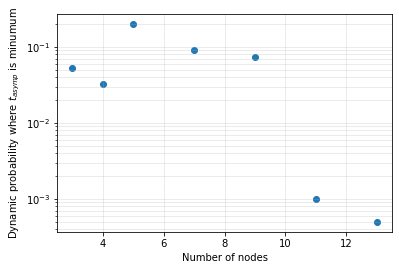

In [75]:
plt.scatter(num_node_list, min_dynamic_prob)
plt.xlabel("Number of nodes")
plt.ylabel(r"Dynamic probability where $t_{asymp}$ is minumum")
plt.yscale('log')
plt.grid(which='both',alpha=0.3)
plt.savefig(plot_path + f"fmin_vs_N.png")
print(min_dynamic_prob)

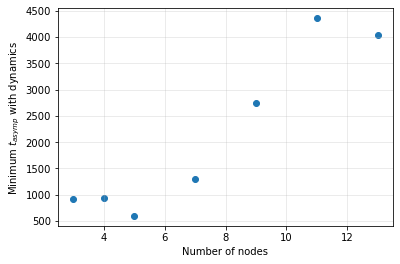

In [76]:
plt.scatter(num_node_list, min_asymp_t)
plt.xlabel("Number of nodes")
plt.ylabel(r"Minimum $t_{asymp}$ with dynamics")
plt.grid(which='both',alpha=0.3)
plt.savefig(plot_path + f"tAmin_vs_N")

# Plotting histograpm of t_asymp for F=0 and F=0.1

## N=3

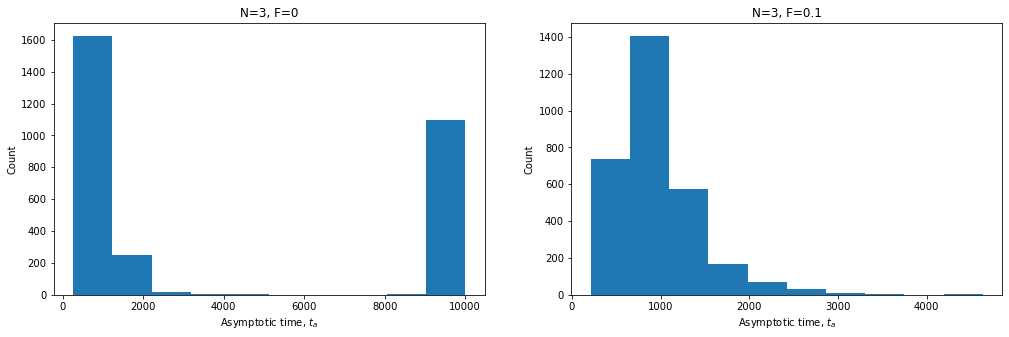

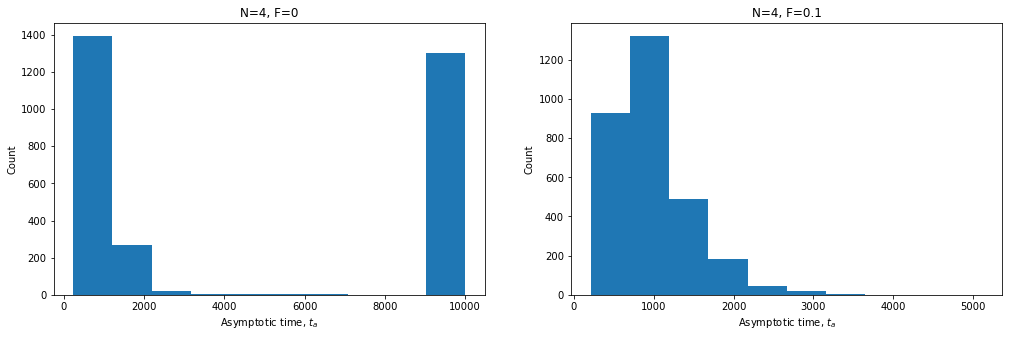

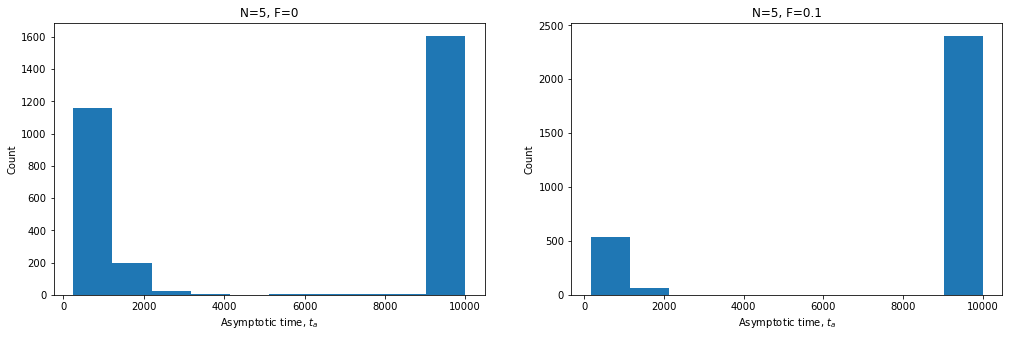

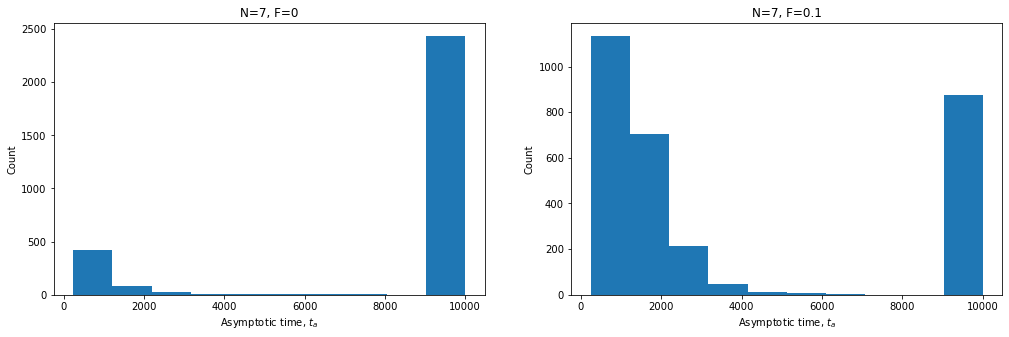

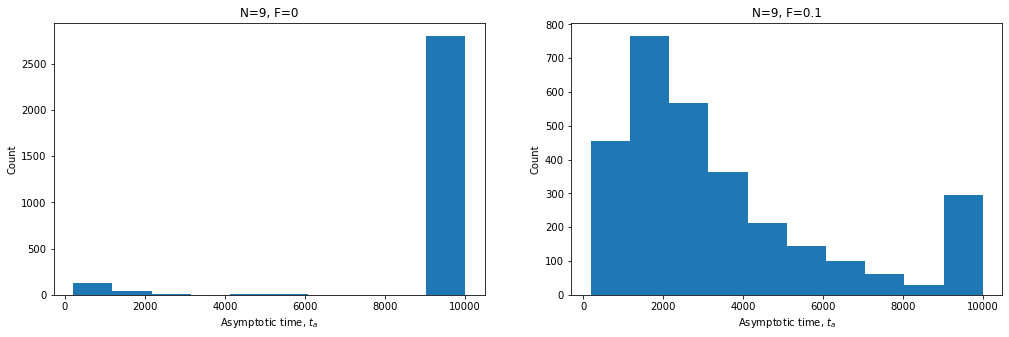

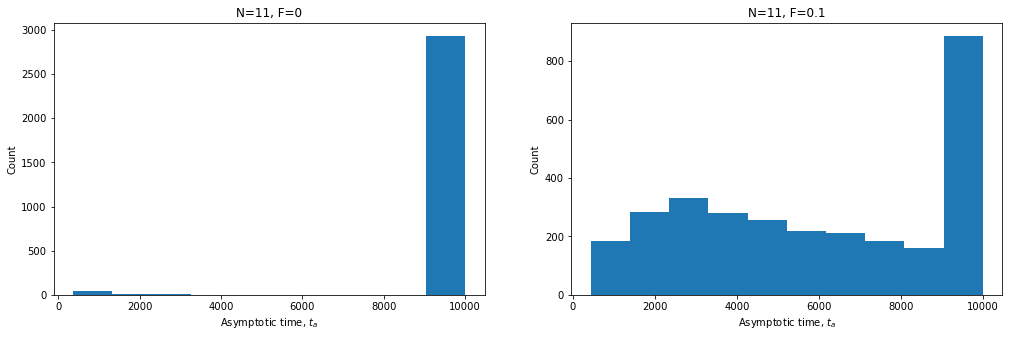

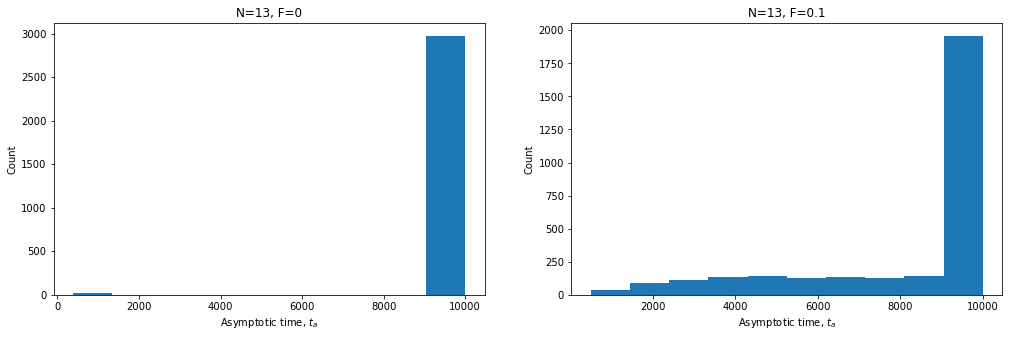

In [80]:
dynamic_prob = [0,0.1]

num_node_list = [3,4, 5, 7, 9, 11, 13]

for num_node in num_node_list: 
    avg_asymp_t = []
    stddev_asymp_t = []
    dynamic_prob_list = []
    subplot = 121
    plt.figure(figsize=(17,5))
    for p in dynamic_prob: 
        dynamic_fraction = f"{p:.4f}"
        try: 
            d = f'N{num_node}_test_results_finetune/F{dynamic_fraction}.dat'
            data = open(d, "r")
            asymp_time_list = []
            for line in data: 
                asymp_time_list.append(int(line.split("\t")[1]))
            ax = plt.subplot(subplot)
            ax.hist(asymp_time_list)
            ax.set_xlabel(r'Asymptotic time, $t_a$')
            ax.set_ylabel(r'Count')
            ax.set_title("N={}, F={}".format(num_node, p))
            subplot+=1
        except FileNotFoundError:
            pass
    plt.savefig(plot_path + "histogram_N={}.png".format(num_node))

## Control Test

1. Generate five N=9 Barabasi_albert networks with m=2 and different RNG seeds (i.e. different topology)
2. Run 10000 non-dynamic simulations on each of the networks, where the value of non-zero edges are randomised for each run
3. Analyse the statistics for each network topology i.e. check for number of runs where asymptotic learning is (not) achieved

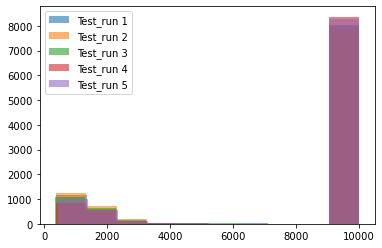

In [31]:
test_num = np.arange(1,6)

avg_asymp_t = []
eliminated_runs = []

for test in test_num: 
    d = f'dynamicP_N9_test/N9_control_test_{test}/F0.0000.dat'
    data = open(d, "r")
    asymp_time_list = []
    for line in data: 
        asymp_time_list.append(int(line.split("\t")[1]))
    avg_t_asymp, med_t_asymp, stddev_t_asymp, tot_runs, runs_eliminated, percentage_eliminated = average_t_asymp(asymp_time_list, 10000)
    plt.hist(asymp_time_list, label=f'Test_run {test}', alpha=0.6)
plt.legend()

## Reduced Dataset

To check if the size of our dataset is sufficient for generalisation

In [76]:
dynamicP_prob = np.arange(0.00, 0.014, 0.0005)
avg_asymp_t_dynP = []
eliminated_runs_dynP = []

num_node = 9
sample_size = 2000

for p in dynamicP_prob: 
    dynamic_fraction = f"{p:.4f}"
    d = f'dynamicP_N9_test/N{num_node}_test_results_dynamicP/F{dynamic_fraction}.dat'
    data = open(d, "r")
    asymp_time_list = []
    for line in data: 
        asymp_time_list.append(int(line.split("\t")[1]))
    asymp_time_list = random.sample(asymp_time_list,sample_size)
    avg_t_asymp, med_t_asymp, stddev_t_asymp, tot_runs, runs_eliminated, percentage_eliminated = average_t_asymp(asymp_time_list, 10000)
#    print(p, runs_eliminated)
    avg_asymp_t_dynP.append(avg_t_asymp)
    eliminated_runs_dynP.append(runs_eliminated)


In [80]:
dynamic_prob = np.arange(0.00, 0.2, 0.0005)
avg_asymp_t = []
eliminated_runs = []

num_node = 9
sample_size = 2000

for p in dynamic_prob: 
    dynamic_fraction = f"{p:.4f}"
    d = f'N{num_node}_test_results_finetune/F{dynamic_fraction}.dat'
    data = open(d, "r")
    asymp_time_list = []
    for line in data: 
        asymp_time_list.append(int(line.split("\t")[1]))
    asymp_time_list = random.sample(asymp_time_list,sample_size)
    avg_t_asymp, med_t_asymp, stddev_t_asymp, tot_runs, runs_eliminated, percentage_eliminated = average_t_asymp(asymp_time_list, 10000)
#     print(p, runs_eliminated)
    avg_asymp_t.append(avg_t_asymp)
    eliminated_runs.append(runs_eliminated)
print(len(avg_asymp_t), len(dynamic_prob))

400 400


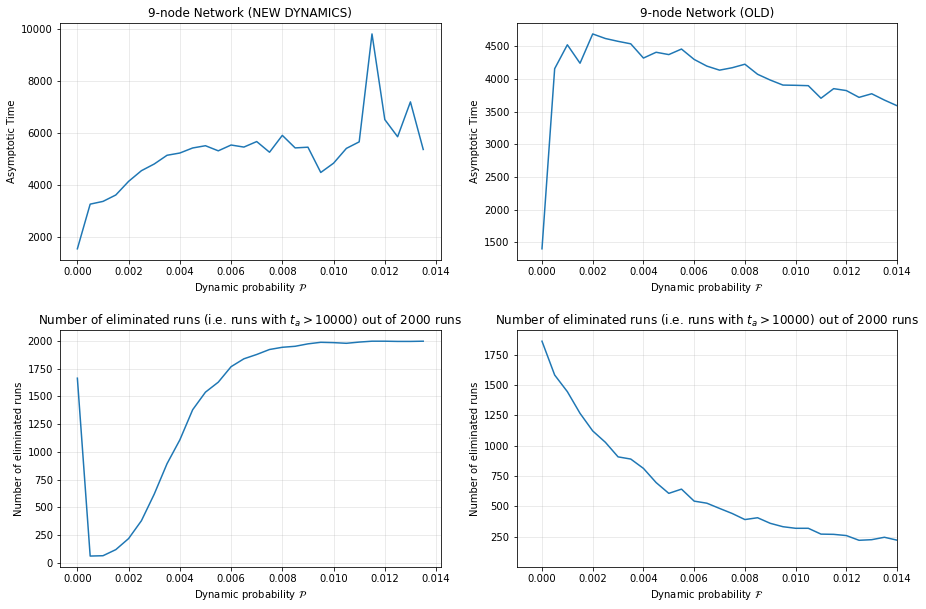

In [81]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
ax = plt.subplot(221)
ax.plot(dynamicP_prob, avg_asymp_t_dynP)
ax.set_xlabel(r"Dynamic probability $\mathcal{P}$")
ax.set_ylabel("Asymptotic Time")
ax.set_title(f"{num_node}-node Network (NEW DYNAMICS)")
#plt.savefig(plot_path + f"N{num_node}_finetune.png")
#ax.set_xlim(-0.001,0.010)
ax.grid(which='both',alpha=0.3)

ax = plt.subplot(223)
ax.plot(dynamicP_prob, eliminated_runs_dynP)
ax.set_xlabel(r"Dynamic probability $\mathcal{P}$")
ax.set_ylabel(r"Number of eliminated runs")
ax.set_title(r"Number of eliminated runs (i.e. runs with $t_a>10000$) out of {} runs".format(sample_size))
#plt.savefig(plot_path + f"N{num_node}_finetune.png")
#ax.set_xlim(-0.001,0.01)
ax.grid(which='both',alpha=0.3)

ax = plt.subplot(222)
ax.plot(dynamic_prob, avg_asymp_t)
ax.set_xlabel(r"Dynamic probability $\mathcal{F}$")
ax.set_ylabel("Asymptotic Time")
ax.set_title(f"{num_node}-node Network (OLD)")
ax.set_xlim(-0.001,0.014)
ax.grid(which='both',alpha=0.3)
# plt.savefig(plot_path + f"N{num_node}_finetune_cut.png")

ax = plt.subplot(224)
ax.plot(dynamic_prob, eliminated_runs)
ax.set_xlabel(r"Dynamic probability $\mathcal{F}$")
ax.set_ylabel(r"Number of eliminated runs")
ax.set_title(r"Number of eliminated runs (i.e. runs with $t_a>10000$) out of {} runs".format(sample_size))
#plt.savefig(plot_path + f"N{num_node}_finetune.png")
ax.set_xlim(-0.001,0.014)
ax.grid(which='both',alpha=0.3)